<a href="https://colab.research.google.com/github/AUT-Student/NN-HW1/blob/main/NN_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf

# Loading

In [2]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
To: /content/crx.data
100% 32.2k/32.2k [00:00<00:00, 1.25MB/s]


In [3]:
data = pd.read_csv("/content/crx.data", header=None,
                   names=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"])

In [4]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Preprocessing

In [5]:
def convert_question_mark(value):
  if value == "?":
    return None
  else:
    return value

In [6]:
data = data.applymap(convert_question_mark)

In [7]:
continues_columns = ["A2", "A3", "A8", "A11", "A14", "A15"]
discreate_columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13", "A16"]
feature_columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

In [8]:
data[continues_columns] = data[continues_columns].astype(float)
data[continues_columns] = data[continues_columns].fillna(data[continues_columns].mean())
#data[continues_columns] = (data[continues_columns]-data[continues_columns].mean())/data[continues_columns].std()

In [9]:
data[discreate_columns] = data[discreate_columns].fillna(data[discreate_columns].mode().iloc[0])
data[discreate_columns] = data[discreate_columns].apply(lambda col:pd.Categorical(col).codes)

In [10]:
data[feature_columns] = (data[feature_columns]-data[feature_columns].mean())/data[feature_columns].std()

In [11]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0.660958,-0.062276,-0.955920,-0.542556,-0.559093,1.470327,0.757329,-0.290872,0.953958,1.156306,-0.287892,-0.918529,-0.316941,0.104469,-0.195272,0
1,-1.510762,2.286443,-0.060007,-0.542556,-0.559093,1.003664,-0.835832,0.244013,0.953958,1.156306,0.740293,-0.918529,-0.316941,-0.819095,-0.087788,0
2,-1.510762,-0.596305,-0.855481,-0.542556,-0.559093,1.003664,-0.835832,-0.216167,0.953958,-0.863570,-0.493529,-0.918529,-0.316941,0.557537,-0.037117,0
3,0.660958,-0.315370,-0.646569,-0.542556,-0.559093,1.470327,0.757329,0.456175,0.953958,1.156306,0.534656,1.087120,-0.316941,-0.488006,-0.194696,0
4,0.660958,-0.961605,0.174015,-0.542556,-0.559093,1.470327,0.757329,-0.153415,0.953958,-0.863570,-0.493529,-0.918529,3.268131,-0.371835,-0.195272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.660958,-0.884833,1.069928,1.782685,1.793190,-0.396325,-0.835832,-0.290872,-1.046745,-0.863570,-0.493529,-0.918529,-0.316941,0.441366,-0.195272,1
686,-1.510762,-0.750693,-0.805262,-0.542556,-0.559093,-1.096320,0.757329,-0.066758,-1.046745,1.156306,-0.082255,1.087120,-0.316941,0.092851,-0.119649,1
687,-1.510762,-0.533032,1.755924,1.782685,1.793190,-0.162994,-1.234123,-0.066758,-1.046745,1.156306,-0.287892,1.087120,-0.316941,0.092851,-0.195080,1
688,0.660958,-1.151426,-0.914740,-0.542556,-0.559093,-1.329652,0.757329,-0.652442,-1.046745,-0.863570,-0.493529,-0.918529,-0.316941,0.557537,-0.051321,1


In [12]:
data.isna().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
A16    False
dtype: bool

# Shuffling and Splitting

In [13]:
train_data, valid_data, test_data = np.split(data.sample(frac=1, random_state=0), [int(.7*len(data)), int(.8*len(data))])

In [24]:
X_train = train_data[feature_columns]
Y_train = train_data["A16"]

X_valid = valid_data[feature_columns]
Y_valid = valid_data["A16"]

X_test = test_data[feature_columns]
Y_test = test_data["A16"]

# Plotting

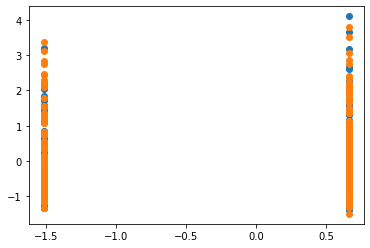

In [14]:
plt.scatter(data[data["A16"]==1]["A1"], data[data["A16"]==1]["A2"])
plt.scatter(data[data["A16"]==0]["A1"], data[data["A16"]==0]["A2"])

In [49]:
pca = PCA(n_components=2)

In [50]:
pca.fit(data.drop(columns=["A16"]))

PCA(n_components=2)

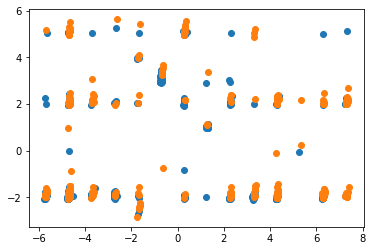

In [56]:
data_t = pca.transform(data[data["A16"]==1].drop(columns=["A16"]))
plt.scatter(data_t[:,0], data_t[:,1])

data_t = pca.transform(data[data["A16"]==0].drop(columns=["A16"]))
plt.scatter(data_t[:,0], data_t[:,1])

In [45]:
print(max(lda.transform(data[data["A16"]==0].drop(columns=["A16"]))))
print(min(lda.transform(data[data["A16"]==0].drop(columns=["A16"]))))

[2.16756797]
[-3.48805656]


In [46]:
print(min(lda.transform(data[data["A16"]==1].drop(columns=["A16"]))))
print(max(lda.transform(data[data["A16"]==1].drop(columns=["A16"]))))

[-1.99280679]
[2.44483627]


# Neural Network

In [15]:
from tensorflow import keras

In [27]:
model = keras.models.Sequential([
                                 keras.layers.Dense(units=128, activation="relu", name="Dense_Layer_1"),
                                 keras.layers.Dense(units=16, activation="relu", name="Dense_Layer_2"),
                                 keras.layers.Dense(2, activation="softmax", name="Output_Layer")
])

In [28]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.6469 - accuracy: 0.6473 - val_loss: 0.5595 - val_accuracy: 0.8571
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.8320 - val_loss: 0.4458 - val_accuracy: 0.8571
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8568 - val_loss: 0.3527 - val_accuracy: 0.8571
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8693 - val_loss: 0.3061 - val_accuracy: 0.8857
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8880 - val_loss: 0.2859 - val_accuracy: 0.8714
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.8838 - val_loss: 0.2824 - val_accuracy: 0.8857
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.8942 - val_loss: 0.2745 - val_accuracy: 0.8857
Epoch 8/20
16/16 [=

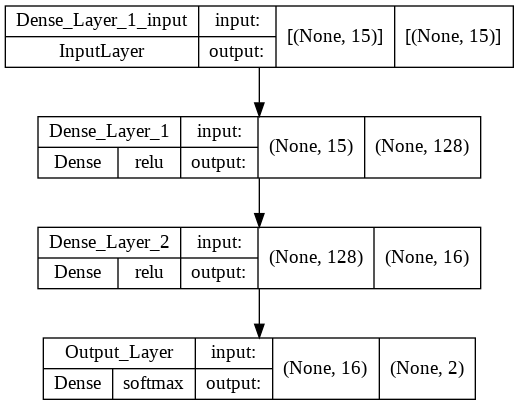

In [31]:
keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True, show_layer_names=True)